In this notebook we will be building a machine learning model using population data to predict heart disease risk.

To do:

* Use Pandas to import the csv data
* One-hot encoding to convert categorical variables into binary form
* Undersample the model to make heart disease vs no heart disease equal
* Random forest model, logistic regression, and KNN to compare models
* Confusion matrix to determine best model
* save the model

In [12]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv("../resources/heart_2020_cleaned.csv", encoding = 'utf-8')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Binarise the yes/no data columns to be 0=No, 1=Yes

In [3]:
# First list all the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# Reformat the data into X and y
X = df.drop("HeartDisease", axis = 1)
y = df.HeartDisease

## Use One Hot Encoding and LabelEncoder to encode the categorical variables

In [5]:
# Put categorical X column names into list
categorical_X = ["Smoking", "AlcoholDrinking", "Stroke", 
               "DiffWalking", "PhysicalActivity", "Asthma",
               "KidneyDisease","SkinCancer", "Sex", 
               "AgeCategory","Race","Diabetic","GenHealth"]

# Using the list above, create a new df with the encoded columns
encoded_X = pd.get_dummies(X, columns = categorical_X)

encoded_X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,1,1,0,0,0,0,0,1,0,0
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,1


In [6]:
# Use LabelEncoder to encode y dataset
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

np.unique(encoded_y)

array([0, 1])

## Use Train Test Split

In [7]:
X = encoded_X
y = encoded_y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f'X train shape: {X_train.shape}')
print(f'X train shape: {X_test.shape}')
print(f'X train shape: {y_train.shape}')
print(f'X train shape: {y_test.shape}')

X train shape: (239846, 50)
X train shape: (79949, 50)
X train shape: (239846, 1)
X train shape: (79949, 1)


## Scale the data using StandardScaler

In [8]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
# Transform the training and testing data to the scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Use Random Undersampling to balance the data between heart disease sample and non heart disease sample

We do this because ~90% of the total data is classified as "No Heart Disease" and only ~10% is classified as "Yes Heart Disease". 

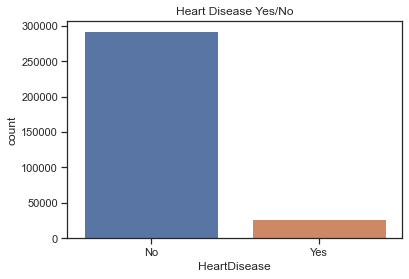

In [11]:
# Plot the distribution of heart disease using sns countplot
sns.countplot(x="HeartDisease", data = df).set(title="Heart Disease Yes/No")
plt.show()

In [13]:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

## TO ASK AKASH why don't we resample the testing data as well?

## Create Random Forest model using the target variable as "HeartDisease"

In [14]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)

# .ravel() will flatten the numpy array
rf = rf.fit(X_train, y_train.ravel())
rf.score(X_test, y_test)

0.7126918410486686